<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Nicholas_George_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [29]:
# TODO - your code!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

rename_columns = {
    0: 'Class Name',
    1: 'Handicapped Infants',
    2: 'Water Project Cost Sharing',
    3: 'Adoption of the Budget Resolution',
    4: 'Physician Free Freeze',
    5: 'El Salvador Aid',
    6: 'Religious Groups in Schools',
    7: 'Anti-Satellite Test Ban',
    8: 'Aid to Nicaraguan Contras',
    9: 'MX Missile',
    10: 'Immigration',
    11: 'Synfuels Corporation Cutback',
    12: 'Education Spending',
    13: 'Superfund Right to Sue',
    14: 'Crime',
    15: 'Duty Free Exports',
    16: 'Export Administration Act South Africa',
}
df = df.rename(columns=rename_columns)

df = df.replace(to_replace =('?','y','n'), value = (0,1,-1))

republicans = df.groupby('Class Name').get_group('republican')
democrats = df.groupby('Class Name').get_group('democrat')

#df = df.set_index('Class Name')

df.head()

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Free Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act South Africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [37]:
df[df==1].sum()

Class Name                                  0.0
Handicapped Infants                       187.0
Water Project Cost Sharing                195.0
Adoption of the Budget Resolution         253.0
Physician Free Freeze                     177.0
El Salvador Aid                           212.0
Religious Groups in Schools               272.0
Anti-Satellite Test Ban                   239.0
Aid to Nicaraguan Contras                 242.0
MX Missile                                207.0
Immigration                               216.0
Synfuels Corporation Cutback              150.0
Education Spending                        171.0
Superfund Right to Sue                    209.0
Crime                                     248.0
Duty Free Exports                         174.0
Export Administration Act South Africa    269.0
dtype: float64

In [38]:
df[df==-1].sum()

Class Name                                  0.0
Handicapped Infants                      -236.0
Water Project Cost Sharing               -192.0
Adoption of the Budget Resolution        -171.0
Physician Free Freeze                    -247.0
El Salvador Aid                          -208.0
Religious Groups in Schools              -152.0
Anti-Satellite Test Ban                  -182.0
Aid to Nicaraguan Contras                -178.0
MX Missile                               -206.0
Immigration                              -212.0
Synfuels Corporation Cutback             -264.0
Education Spending                       -233.0
Superfund Right to Sue                   -201.0
Crime                                    -170.0
Duty Free Exports                        -233.0
Export Administration Act South Africa    -62.0
dtype: float64

In [0]:
#splitting up the data frames
reps_hand_inf = republicans['Handicapped Infants']
dems_hand_inf = democrats['Handicapped Infants']
reps_wpcs = republicans['Water Project Cost Sharing']
dems_wpcs = democrats['Water Project Cost Sharing']
reps_abr = republicans['Adoption of the Budget Resolution']
dems_abr = democrats['Adoption of the Budget Resolution']
reps_pff = republicans['Physician Free Freeze']
dems_pff = democrats['Physician Free Freeze']
reps_ela = republicans['El Salvador Aid']
dems_ela = democrats['El Salvador Aid']
reps_rga = republicans['Religious Groups in Schools']
dems_rga =  democrats['Religious Groups in Schools']
reps_astb = republicans['Anti-Satellite Test Ban']
dems_astb = democrats['Anti-Satellite Test Ban']
reps_anc = republicans['Aid to Nicaraguan Contras']
dems_anc = democrats['Aid to Nicaraguan Contras']
reps_mx = republicans['MX Missile']
dems_mx = democrats['MX Missile']
reps_imm = republicans['Immigration']
dems_imm = democrats['Immigration']
reps_scc = republicans['Synfuels Corporation Cutback']
dems_scc = democrats['Synfuels Corporation Cutback']
reps_es = republicans['Education Spending']
dems_es = democrats['Education Spending']
reps_srs = republicans['Superfund Right to Sue']
dems_srs = democrats['Superfund Right to Sue']
reps_crime = republicans['Crime']
dems_crime = democrats['Crime']
reps_dfe = republicans['Duty Free Exports']
dems_dfe = democrats['Duty Free Exports']
reps_eaasa = republicans['Export Administration Act South Africa']
dems_eaasa = democrats['Export Administration Act South Africa']


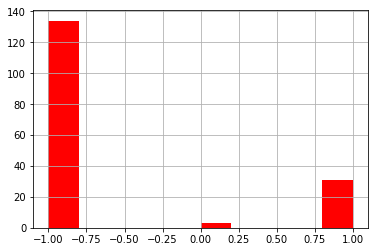

In [5]:
reps_hand_inf.hist(color='r');

In [11]:
reps_hand_inf.value_counts()

-1    134
 1     31
 0      3
Name: Handicapped Infants, dtype: int64

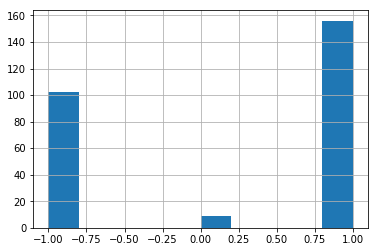

In [13]:
dems_hand_inf.hist();

In [14]:
dems_hand_inf.value_counts()

 1    156
-1    102
 0      9
Name: Handicapped Infants, dtype: int64

In [15]:
#we can say 156 democrats approve of the handicapped infants bill
#so our sampling proportion, p hat is...
p_hat = 156 / (156+102+9)
p_hat
#the parameter P is the proportion of all democrats who would say they approve of the handicapped infants bill

0.5842696629213483

In [54]:
democrats.shape

(267, 17)

In [55]:
#Standard error
#not sure what n should be? just guessed...sample size total votes?
SE_phat = np.sqrt((p_hat*(1-p_hat))/(267))
SE_phat

0.03016177504432437

In [0]:
#so 

In [60]:
#getting the range
p_hat_minus = (p_hat - SE_phat)
p_hat_plus = (p_hat + SE_phat )

print('With 95% confidence between ', round(p_hat_minus, 3)*100,'% and ', round(p_hat_plus, 3)*100,'%', ' of democrats support the Handicapped Infants bill.')

With 95% confidence between  55.400000000000006 % and  61.4 %  of democrats support the Handicapped Infants bill.


In [0]:
#plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')

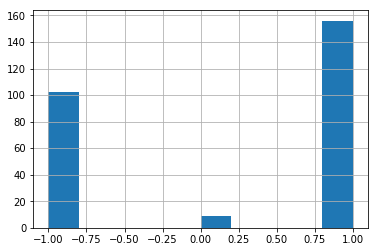

In [7]:
dems_hand_inf.hist();

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

In [0]:
#notes
#if you produce a large enough subset of samples in some data, their means will be normall distributed

Notes:

if you produce a large enough subset of samples in some data, their means will be normall distributed